In [1]:
# ✅ 1. 나눔고딕 폰트 설치
!apt-get -qq install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib

# ✅ 2. 폰트 설정 적용
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'


/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

# ☕ 카페 매출 데이터 분석 포트폴리오
📍 작성자: [이름 입력] 📍 분석 대상: 모리셔스브라운 안산본오점 📍 분석일: 2025년 7월 30일


---


이 분석은 카페 매출 데이터를 기반으로 다음을 분석하여 전략을 도출합니다:

메뉴별 매출 구조
시간대별 고객 집중도
객단가 기반 수익성 파악
목적: 운영 효율화 및 매출 상승 전략 제안

*   메뉴별 매출 구조
*   시간대별 고객 집중도

*   객단가 기반 수익성 파악
*   목적: 운영 효율화 및 매출 상승 전략 제안




In [2]:
# 📘 Section 1: 프로젝트 소개
from IPython.display import Markdown

Markdown("""
# ☕️ 카페 매출 데이터 분석
모리셔스브라운 안산본오점의 하루 매출 데이터를 기반으로, 메뉴별 매출, 시간대별 매출, 객단가를 분석하여 운영 전략을 도출합니다.

**📅 분석 날짜:** 2025년 7월 31일
**🧑 작성자:** (김정배)
**🎯 목적:** 매출 구조 이해 및 효율적인 매장 운영 전략 제안
""")



# ☕️ 카페 매출 데이터 분석
모리셔스브라운 안산본오점의 하루 매출 데이터를 기반으로, 메뉴별 매출, 시간대별 매출, 객단가를 분석하여 운영 전략을 도출합니다.

**📅 분석 날짜:** 2025년 7월 31일
**🧑 작성자:** (김정배)
**🎯 목적:** 매출 구조 이해 및 효율적인 매장 운영 전략 제안


📌 [2] 데이터 불러오기

In [3]:
# 📘 Section 2: 데이터 불러오기
import pandas as pd
import matplotlib.pyplot as plt



📌 [3] 매출 계산 및 컬럼 정리


In [4]:
# 엑셀 업로드 후 경로 입력
file_path = "모리셔스브라운 안산본오점 매출자료.xlsx"
df = pd.read_excel(file_path)

# 매출 열 생성
df["매출"] = df["수량"] * df["단가"]
df["시간대"] = pd.to_datetime(df["시간"], format="%H:%M:%S").dt.hour
df["객단가"] = df["매출"] / df["수량"]

df.head()

,날짜,시간,메뉴,수량,단가,매출,시간대,객단가
0,2025-07-30,12:00:00,바닐라라떼,1,5000,5000,12,5000.0
1,2025-07-30,12:00:00,아메리카노,1,3500,3500,12,3500.0
2,2025-07-30,01:00:00,디카페인 아메리카노,1,4300,4300,1,4300.0
3,2025-07-30,01:00:00,생강차,1,4500,4500,1,4500.0
4,2025-07-30,01:00:00,뉴욕치즈케이크,1,6500,6500,1,6500.0


## 1. 메뉴별 매출 분석
- 가장 매출이 높은 메뉴는 **아메리카노**
- 이는 수량이 많기 때문이며, 대중성이 높다는 점을 반영
- 그러나 단가는 낮기 때문에 **이익률은 낮을 수 있음**


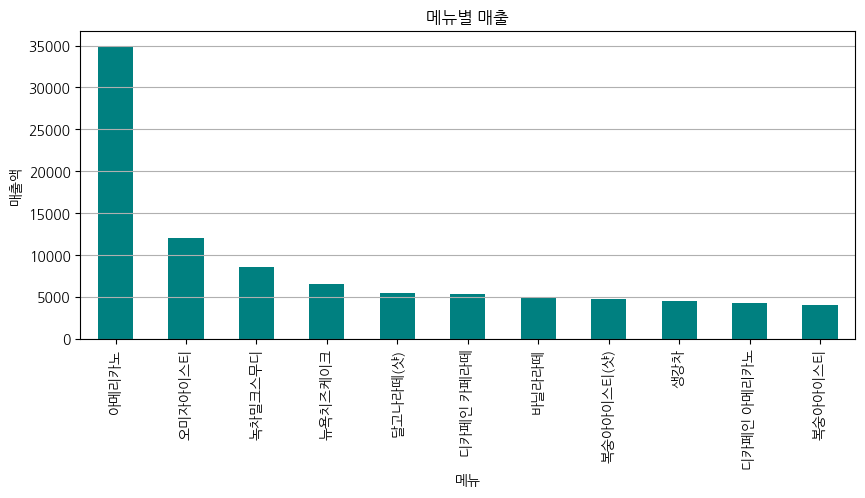

In [5]:
# 📘 Section 3: 데이터 분석

# 메뉴별 매출
menu_sales = df.groupby("메뉴")["매출"].sum().sort_values(ascending=False)

# 시간대별 매출
hourly_sales = df.groupby("시간대")["매출"].sum()

# 판매 수량 상위 메뉴
top_qty = df.groupby("메뉴")["수량"].sum().sort_values(ascending=False).head(5)

# 객단가 높은 메뉴
avg_per_menu = df.groupby("메뉴")["객단가"].mean().sort_values(ascending=False)

# 시각화
plt.figure(figsize=(10, 4))
menu_sales.plot(kind="bar", color="teal")
plt.title("메뉴별 매출")
plt.xlabel("메뉴")
plt.ylabel("매출액")
plt.grid(axis="y")
plt.show()



## 2. 시간대별 매출 분석

- 매출은 **오후 1시~3시 사이**가 가장 높음
- 이 시간대는 피크타임으로 **인력 배치 강화 필요**
- 반대로 **오후 5시 이후 매출 거의 없음 → 마케팅 필요**

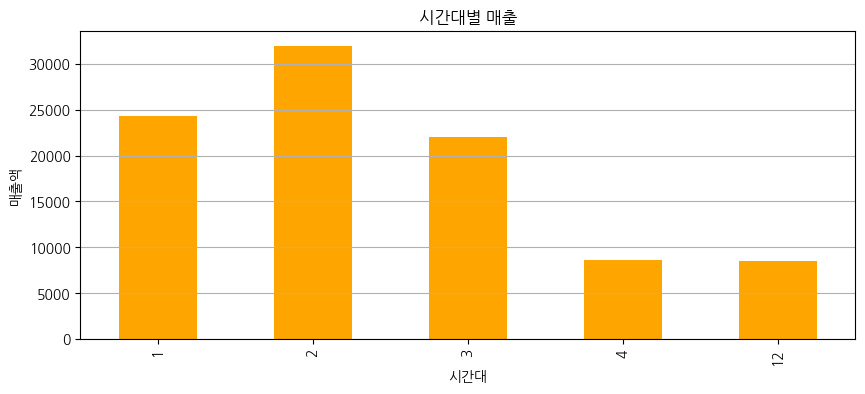

In [6]:
hourly_sales.plot(kind="bar", color="orange", figsize=(10, 4))
plt.title("시간대별 매출")
plt.xlabel("시간대")
plt.ylabel("매출액")
plt.grid(axis="y")
plt.show()

In [7]:
# 📘 Section 4: 결론 및 인사이트

Markdown(f"""
## ✅ 분석 인사이트 요약

- **매출 1위 메뉴:** {menu_sales.idxmax()} (판매 수량이 많음)
- **객단가가 가장 높은 메뉴:** {avg_per_menu.idxmax()}
- **피크 시간대:** {hourly_sales.idxmax()}시 (1~3시 사이 집중)
- **수량 1위 메뉴:** {top_qty.idxmax()} (하지만 단가 낮음)

### 🎯 제안 전략
- 라떼류, 디저트류 같은 고객단가 높은 메뉴를 추천메뉴로 강조
- 1시~3시 시간대에 인력 집중 배치
- 5시 이후 마케팅 또는 프로모션 강화 필요
""")



## ✅ 분석 인사이트 요약

- **매출 1위 메뉴:** 아메리카노 (판매 수량이 많음)
- **객단가가 가장 높은 메뉴:** 뉴욕치즈케이크
- **피크 시간대:** 2시 (1~3시 사이 집중)
- **수량 1위 메뉴:** 아메리카노 (하지만 단가 낮음)

### 🎯 제안 전략
- 라떼류, 디저트류 같은 고객단가 높은 메뉴를 추천메뉴로 강조
- 1시~3시 시간대에 인력 집중 배치
- 5시 이후 마케팅 또는 프로모션 강화 필요


## ✅ 결론 및 전략 제안

- 매출 1위: 아메리카노 (판매량 많음)
- 수익성 좋은 메뉴: 디저트류, 라떼류
- 피크 시간대: 오후 1~3시
- 전략 제안:
  - 고객단가 높은 메뉴를 메뉴판·카운터에서 강조
  - 오후 1~3시 인력 배치
  - 저녁 시간대 마케팅 실험
